In [2]:
import numpy as np
from scipy.stats import norm
import math
import pandas as pd
import matplotlib.pyplot as plt

Black Scholes Formula:
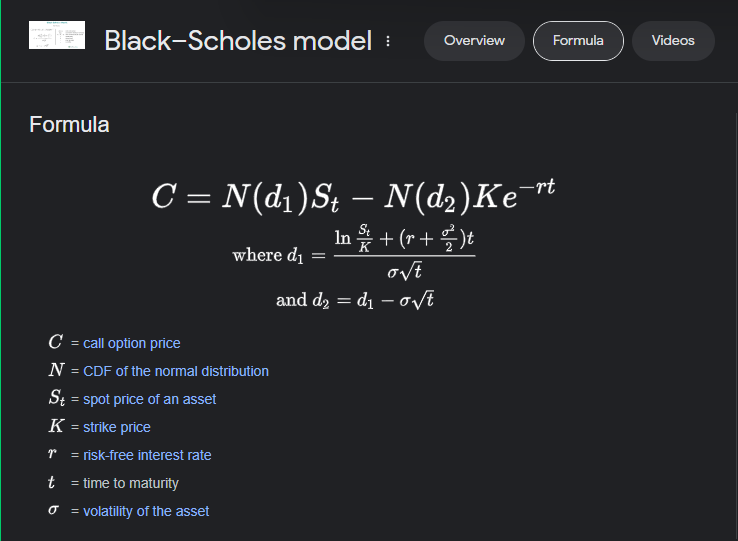

Note that there are certain conditions in which Black Scholes formula works. It's assumptions include:
1. Direction of the stock's price can't be consistently predicted and follows a Geometric Brownian Motion with no drift. (Or as I like to call anti-market efficient hypothesis)
2. The risk-free rate and volatility of the underlying asset are known and constant.
3. Returns on the underlying asset are normally distributed. Due to the relation between returns and prices, a normal distribution of returns implies a lognormal distribution of prices.
4. There are no dividends or other distributions during the option's life.
5. The option is European (cannot be exercised before expiry)

In [3]:
'''
price: price of option
K: strike price
S: price of underlying asset
T: Time to maturity
'''

def d1(S, K, T, rf, sigma):
    return (math.log(S/K) + (rf + (sigma**2)/2) * T)/sigma * math.sqrt(T)

def d2(S, K, T, rf, sigma):
    return d1(S, K, T, rf, sigma) - sigma * math.sqrt(T)

In [4]:
def bs_call_price(S, K, T, rf, sigma):
    return norm.cdf(d1(S, K, T, rf, sigma)) * S - norm.cdf(d2(S, K, T, rf, sigma)) * K * math.exp(-rf*T)

def bs_put_prices(S, K, T, rf, sigma):
    return K*math.exp(-r*T) - S*bs_call(S, K, T, rf, sigma)

The volatility used in Black Scholes formula is usually calculated through historical volatility (Average/ Exponential weighted Average). However, we can always see the price of some options in the market. In a ideal market, these prices should match the Black Scholes values but that might not be the case always. Since strike price, option and asset's price as well as time to maturity is within the defining terms of contract, we can change sigma to match the option price. This sigma is called implied volatility since this is based on the option price of current market and hence people's assumptions.

In [6]:
# Finding historical volatility (Equally weighted pct change)
sigma = pd.read_csv('../data/TCS-NSE.csv')['Adj Close'].pct_change().std() * math.sqrt(250)
# european option - expires in 7 weeks
call_opt_price = bs_call_price(3321, 3300, 35/250, 0.052, sigma)
call_opt_price

# The actual market bid is 128. This is a pretty close approximation! 
# And with better research and model fitting, it could be much better

116.15202410865777

In [7]:
sigma

0.19045223326131627

In [16]:
# Plotting BS option price and strike price
df = pd.read_csv('../data/tcs-option-chain.csv')


pandas.core.series.Series

In [24]:
df['CALLS']

NaN  OI   CHNG IN OI  VOLUME  IV     LTP     CHNG   BID QTY  BID     ASK     ASK QTY  STRIKE    BID QTY  BID     ASK     ASK QTY  CHNG    LTP     IV     VOLUME    CHNG IN OI
     -    -           -       -      -       -      -        -       664.50  7,000    2,780.00  -        -       -       -        -       -       -      -                  -
                                                                     643.70  7,000    2,800.00  -        -       -       -        -       -       -      -                  -
                                                    7,000    476.00  632.90  7,000    2,820.00  -        -       -       -        -       -       -      -                  -
                                                             457.65  609.65  7,000    2,840.00  -        -       -       -        -       -       -      -                  -
                                                    -        -       -       -        2,860.00  -        -       -       -        

In [31]:
for i, v in df['CALLS'].items():
    print('index: ', i, 'value: ', v) # ok so the df is really really bad

index:  (nan, 'OI', 'CHNG IN OI', 'VOLUME', 'IV', 'LTP', 'CHNG', 'BID QTY', 'BID', 'ASK', 'ASK QTY', 'STRIKE', 'BID QTY', 'BID', 'ASK', 'ASK QTY', 'CHNG', 'LTP', 'IV', 'VOLUME') value:  CHNG IN OI
index:  (nan, '-', '-', '-', '-', '-', '-', '-', '-', '664.50', '7,000', '2,780.00', '-', '-', '-', '-', '-', '-', '-', '-') value:  -
index:  (nan, '-', '-', '-', '-', '-', '-', '-', '-', '643.70', '7,000', '2,800.00', '-', '-', '-', '-', '-', '-', '-', '-') value:  -
index:  (nan, '-', '-', '-', '-', '-', '-', '7,000', '476.00', '632.90', '7,000', '2,820.00', '-', '-', '-', '-', '-', '-', '-', '-') value:  -
index:  (nan, '-', '-', '-', '-', '-', '-', '7,000', '457.65', '609.65', '7,000', '2,840.00', '-', '-', '-', '-', '-', '-', '-', '-') value:  -
index:  (nan, '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '2,860.00', '-', '-', '-', '-', '-', '-', '-', '-') value:  -
index:  (nan, '-', '-', '-', '-', '-', '-', '-', '-', '564.60', '7,000', '2,880.00', '-', '-', '-', '-', '-', '-', '-',

In [ ]:
def bs_call_volatity(price, K, S, T, rf, optimize=None, error=0.001):
    sigma = 0.01
    while True:
        possible_price = bs_call_price(S, K, T, rf, sigma)
        if abs(possible_price - price) <= error:
            return sigma
        sigma += 1
        if sigma >= 2:
            print(f'Hm, something might be wrong in the datset. Let me look')
            return

In [ ]:
bs_call_volatity(10.45, 367, 365, 40/250, 0.052)

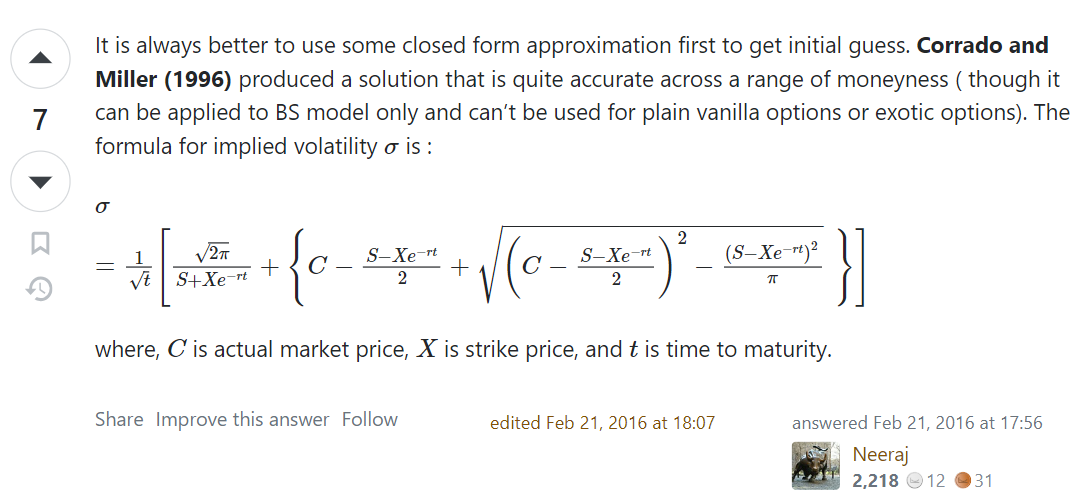

https://quant.stackexchange.com/questions/24425/how-to-select-the-initial-guess-for-implied-volatility

Analysis of Corrado and Miller: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=584982